In [2]:
#importing Libraies
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

/opt/anaconda3/envs/python_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Group the Skill by Month


In [4]:
df_ds_in = df[(df['job_country'] == 'India') & (df['job_title'] == 'Data Scientist')]

df_ds_in['job_posted_month_no'] = df_ds_in['job_posted_date'].dt.month

df_ds_in_explode = df_ds_in.explode('job_skills')

/var/folders/qx/9ff7kw_n7m12w07nftpg9vsm0000gn/T/ipykernel_1535/3481188893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds_in['job_posted_month_no'] = df_ds_in['job_posted_date'].dt.month


#### Pivot in prep for plotting
Create a pivot table from the df_DA_US_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [5]:
df_ds_in_pivot =df_ds_in_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

df_ds_in_pivot

job_skills,airflow,alteryx,angular,ansible,asp.net,assembly,atlassian,aurora,aws,azure,...,visual basic,vmware,vue,vue.js,watson,webex,windows,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,7,8,7,3,3,0,3,0,111,82,...,4,0,0,1,0,1,5,11,0,0
2,3,4,1,1,0,0,0,0,48,40,...,1,0,0,0,2,0,3,4,1,2
3,6,3,1,2,0,2,0,0,57,48,...,1,0,0,0,3,0,0,7,0,0
4,4,8,5,0,0,1,0,0,72,49,...,0,1,0,0,4,0,2,7,0,0
5,4,6,3,0,2,1,0,1,65,48,...,0,1,0,0,1,0,1,4,0,0
6,8,5,4,2,0,0,5,0,67,56,...,3,0,0,0,1,0,4,7,1,0
7,2,5,5,0,0,2,0,1,58,48,...,0,0,0,0,0,0,1,3,0,0
8,11,7,2,0,0,0,0,1,77,59,...,1,0,0,0,0,0,0,7,0,0
9,5,3,2,0,0,0,1,0,73,70,...,0,1,1,0,0,0,0,9,1,0


**Sort columns by count and change month numbers to names**

In [6]:
df_ds_in_pivot.loc['Total'] = df_ds_in_pivot.sum()

df_ds_in_pivot = df_ds_in_pivot[df_ds_in_pivot.loc['Total'].sort_values(ascending=False).index]
df_ds_in_pivot = df_ds_in_pivot.drop('Total')

df_ds_in_pivot

job_skills,python,sql,r,tableau,aws,tensorflow,spark,azure,pytorch,hadoop,...,ionic,vue.js,sqlite,haskell,groovy,trello,sass,terminal,clickup,laravel
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,346,230,175,89,111,91,85,82,50,77,...,1,1,0,0,0,0,1,0,0,0
2,189,119,100,56,48,52,42,40,43,44,...,0,0,1,0,0,0,0,0,0,0
3,235,163,113,77,57,58,62,48,42,36,...,0,0,0,1,0,0,0,0,0,0
4,225,174,112,83,72,64,56,49,54,40,...,0,0,0,0,0,0,0,0,0,0
5,187,128,77,52,65,53,38,48,45,27,...,0,0,0,0,0,0,0,0,0,0
6,317,178,152,68,67,77,66,56,61,52,...,0,0,0,0,0,0,0,0,0,0
7,230,172,121,64,58,64,52,48,55,46,...,0,0,0,0,0,0,0,0,0,0
8,258,178,136,89,77,59,73,59,52,52,...,0,0,0,0,0,0,0,0,1,0
9,244,151,110,61,73,69,63,70,57,48,...,0,0,0,0,0,0,0,0,0,0


#### Plot the Monthly Skill Count
Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

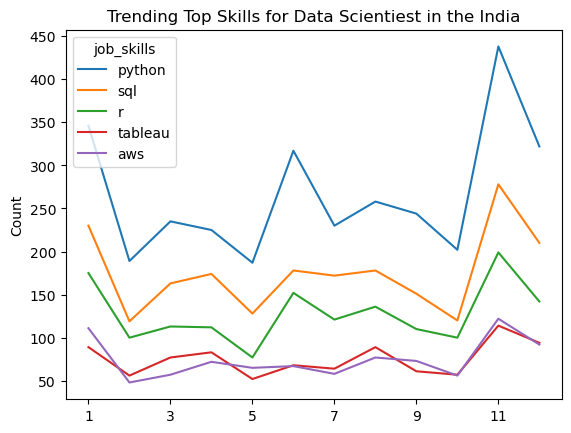

In [7]:
df_ds_in_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Scientiest in the India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

#### Calculate Percentage of Total Jobs

In [8]:
#Get Monthly Total
ds_total = df_ds_in.groupby('job_posted_month_no').size()

ds_total

job_posted_month_no
1     436
2     251
3     298
4     291
5     245
6     376
7     322
8     347
9     308
10    263
11    563
12    435
dtype: int64

In [9]:
#dived first 12 rows of df_ds_in_pivot by ds_total
df_ds_in_percent = df_ds_in_pivot.iloc[:12].div(ds_total/100, axis=0)

#change month number to month name
df_ds_in_percent = df_ds_in_percent.reset_index()
df_ds_in_percent['job_posted_month'] = df_ds_in_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_ds_in_percent = df_ds_in_percent.set_index('job_posted_month')
df_ds_in_percent = df_ds_in_percent.drop(columns='job_posted_month_no')

df_ds_in_percent

job_skills,python,sql,r,tableau,aws,tensorflow,spark,azure,pytorch,hadoop,...,ionic,vue.js,sqlite,haskell,groovy,trello,sass,terminal,clickup,laravel
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,79.357798,52.752294,40.137615,20.412844,25.458716,20.871560,19.495413,18.807339,11.467890,17.660550,...,0.229358,0.229358,0.000000,0.00000,0.000000,0.00000,0.229358,0.00000,0.000000,0.000000
Feb,75.298805,47.410359,39.840637,22.310757,19.123506,20.717131,16.733068,15.936255,17.131474,17.529880,...,0.000000,0.000000,0.398406,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Mar,78.859060,54.697987,37.919463,25.838926,19.127517,19.463087,20.805369,16.107383,14.093960,12.080537,...,0.000000,0.000000,0.000000,0.33557,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Apr,77.319588,59.793814,38.487973,28.522337,24.742268,21.993127,19.243986,16.838488,18.556701,13.745704,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
May,76.326531,52.244898,31.428571,21.224490,26.530612,21.632653,15.510204,19.591837,18.367347,11.020408,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Jun,84.308511,47.340426,40.425532,18.085106,17.819149,20.478723,17.553191,14.893617,16.223404,13.829787,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Jul,71.428571,53.416149,37.577640,19.875776,18.012422,19.875776,16.149068,14.906832,17.080745,14.285714,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
Aug,74.351585,51.296830,39.193084,25.648415,22.190202,17.002882,21.037464,17.002882,14.985591,14.985591,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.288184,0.000000
Sep,79.220779,49.025974,35.714286,19.805195,23.701299,22.402597,20.454545,22.727273,18.506494,15.584416,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


#### Plot Monthly Skill Demand
Creates a line plot for the top five skills of data scientist, shown as percentages of the total job entries per month,

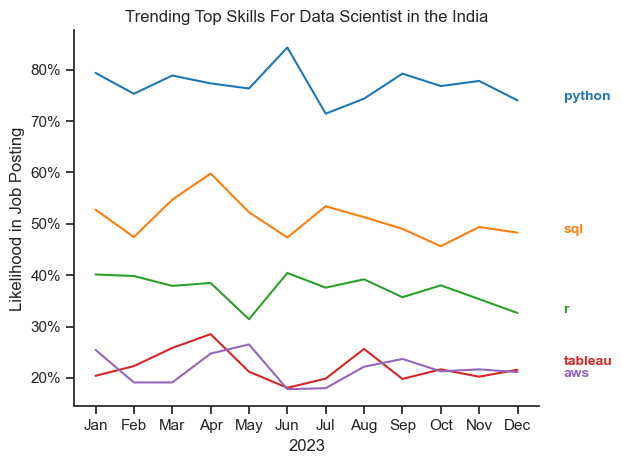

In [19]:
from matplotlib.ticker import PercentFormatter

df_plot = df_ds_in_percent.iloc[:, :5]
sns.set_theme(style='ticks')
palette = sns.color_palette('tab10')  # Get consistent colors

sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.despine()

plt.title('Trending Top Skills For Data Scientist in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

#annote the plot with top 5 skills
label_offsets = {
    'aws': -1,
    'tableau': 1,
    'python': 0,
    'sql': 0,
    'r': 0,
}

# Loop over the top 5 skills
for i in range(5):
    skill = df_plot.columns[i]
    y_val = df_plot.iloc[-1, i]
    offset = label_offsets.get(skill.lower(), 0)
    color = palette[i]  # Match line color
    plt.text(12.2, y_val + offset, skill, color=color, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

plt.show()